In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier

In [2]:
#Executar só se o upload do google colab não funcionar
#from google.colab import files
#uploaded = files.upload()

#Lê o arquivo quando já feito o upload no google colab
df = pd.read_csv('ObesityDataSet.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [3]:
# Renomeando as colunas em pt br
df.rename(columns={'Gender': 'genero'}, inplace=True)
df.rename(columns={'Age': 'idade'}, inplace=True)
df.rename(columns={'Height': 'altura'}, inplace=True)
df.rename(columns={'Weight': 'peso'}, inplace=True)
df.rename(columns={'family_history_with_overweight': 'historico_familiar_sobrepeso'}, inplace=True)
df.rename(columns={'FAVC': 'consumo_freq_alimentos_altamente_caloricos'}, inplace=True)
df.rename(columns={'FCVC': 'consumo_freq_vegetais'}, inplace=True)
df.rename(columns={'NCP': 'qtd_refeicoes_principais'}, inplace=True)
df.rename(columns={'CAEC': 'consumo_alimentos_entre_ref'}, inplace=True)
df.rename(columns={'SMOKE': 'fumante'}, inplace=True)
df.rename(columns={'CH2O': 'consumo_agua'}, inplace=True)
df.rename(columns={'SCC': 'monitoramento_consumo_calorias'}, inplace=True)
df.rename(columns={'FAF': 'freq_atividade_fisica'}, inplace=True)
df.rename(columns={'TUE': 'tempo_consumo_disp_tecnologia'}, inplace=True)
df.rename(columns={'CALC': 'consumo_alcool'}, inplace=True)
df.rename(columns={'MTRANS': 'transporte_utilizado'}, inplace=True)
df.rename(columns={'NObeyesdad': 'nivel_obesidade'}, inplace=True)

# Verificando as infos
df.rename(columns={'CH2O': 'consumo_agua'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   genero                                      2111 non-null   object 
 1   idade                                       2111 non-null   float64
 2   altura                                      2111 non-null   float64
 3   peso                                        2111 non-null   float64
 4   historico_familiar_sobrepeso                2111 non-null   object 
 5   consumo_freq_alimentos_altamente_caloricos  2111 non-null   object 
 6   consumo_freq_vegetais                       2111 non-null   float64
 7   qtd_refeicoes_principais                    2111 non-null   float64
 8   consumo_alimentos_entre_ref                 2111 non-null   object 
 9   fumante                                     2111 non-null   object 
 10  consumo_agua

In [4]:
# Verificando valores e quantidades de cada coluna (precisar ser uma por bloco, todas juntas não funciona, perguntar para o prof depois)
df['genero'].value_counts()

# Dicionário para atualizar as variaveis em pt br
ptbr = {
    'Male': 'Masculino',
    'Female': 'Feminino',
}

# Atualizando os valores para portugues
df['genero'] = df['genero'].replace(ptbr)

# Transformando variáveis categóricas em numéricas (One-Hot Encoding)
df = pd.get_dummies(df, columns=['genero'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   idade                                       2111 non-null   float64
 1   altura                                      2111 non-null   float64
 2   peso                                        2111 non-null   float64
 3   historico_familiar_sobrepeso                2111 non-null   object 
 4   consumo_freq_alimentos_altamente_caloricos  2111 non-null   object 
 5   consumo_freq_vegetais                       2111 non-null   float64
 6   qtd_refeicoes_principais                    2111 non-null   float64
 7   consumo_alimentos_entre_ref                 2111 non-null   object 
 8   fumante                                     2111 non-null   object 
 9   consumo_agua                                2111 non-null   float64
 10  monitorament

In [6]:
# Nome das colunas a serem movidas
colunas_a_mover = ['genero_Masculino', 'genero_Feminino']

# Nome da coluna após a qual você quer posicionar as colunas
coluna_referencia = 'idade'

# Obter a posição da coluna de referência
posicao = df.columns.get_loc(coluna_referencia) + 1  # +1 para colocar logo após a coluna de referência

# Criar a nova ordem das colunas
nova_ordem = (
    list(df.columns[:posicao]) +  # Todas as colunas até a posição de referência
    colunas_a_mover +             # As colunas que queremos mover
    [col for col in df.columns if col not in colunas_a_mover and col not in df.columns[:posicao]]  # Restantes
)

# Reorganizar o DataFrame
df = df[nova_ordem]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   idade                                       2111 non-null   float64
 1   genero_Masculino                            2111 non-null   bool   
 2   genero_Feminino                             2111 non-null   bool   
 3   altura                                      2111 non-null   float64
 4   peso                                        2111 non-null   float64
 5   historico_familiar_sobrepeso                2111 non-null   object 
 6   consumo_freq_alimentos_altamente_caloricos  2111 non-null   object 
 7   consumo_freq_vegetais                       2111 non-null   float64
 8   qtd_refeicoes_principais                    2111 non-null   float64
 9   consumo_alimentos_entre_ref                 2111 non-null   object 
 10  fumante     

In [8]:
df['idade'].value_counts()

idade
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
21.680123      1
24.469756      1
25.127910      1
25.986368      1
23.761970      1
Name: count, Length: 1402, dtype: int64

In [9]:
df['altura'].value_counts()

altura
1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.643421     1
1.640535     1
1.626483     1
1.645990     1
1.631547     1
Name: count, Length: 1574, dtype: int64

In [10]:
df['peso'].value_counts()

peso
80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
111.939983     1
111.555967     1
111.357062     1
111.922491     1
102.174953     1
Name: count, Length: 1525, dtype: int64

In [11]:
df['historico_familiar_sobrepeso'].value_counts()
# Dicionário para atualizar as variaveis em pt br
ptbr = {
    'yes': 'Sim',
    'no': 'Nao',
}

# Atualizando os valores para portugues
df['historico_familiar_sobrepeso'] = df['historico_familiar_sobrepeso'].replace(ptbr)

# Verificando valores
df['historico_familiar_sobrepeso'].value_counts()

historico_familiar_sobrepeso
Sim    1726
Nao     385
Name: count, dtype: int64

In [12]:
# Atualizando os valores para 1 e 0
df['historico_familiar_sobrepeso'] = df['historico_familiar_sobrepeso'].replace({'Sim': 1, 'Nao': 0})

# Verificando os valores atualizados
df['historico_familiar_sobrepeso'].value_counts()

C:\Users\João P\AppData\Local\Temp\ipykernel_11020\4120399998.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['historico_familiar_sobrepeso'] = df['historico_familiar_sobrepeso'].replace({'Sim': 1, 'Nao': 0})


historico_familiar_sobrepeso
1    1726
0     385
Name: count, dtype: int64

In [13]:
df['consumo_freq_alimentos_altamente_caloricos'].value_counts()

# Dicionário para atualizar as variaveis em pt br
ptbr = {
    'yes': 'Sim',
    'no': 'Nao',
}

# Atualizando os valores para portugues
df['consumo_freq_alimentos_altamente_caloricos'] = df['consumo_freq_alimentos_altamente_caloricos'].replace(ptbr)

# Verificando valores
df['consumo_freq_alimentos_altamente_caloricos'].value_counts()

consumo_freq_alimentos_altamente_caloricos
Sim    1866
Nao     245
Name: count, dtype: int64

In [14]:
# Atualizando os valores para 1 e 0
df['consumo_freq_alimentos_altamente_caloricos'] = df['consumo_freq_alimentos_altamente_caloricos'].replace({'Sim': 1, 'Nao': 0})

# Verificando os valores atualizados
print(df['consumo_freq_alimentos_altamente_caloricos'].value_counts())

consumo_freq_alimentos_altamente_caloricos
1    1866
0     245
Name: count, dtype: int64


C:\Users\João P\AppData\Local\Temp\ipykernel_11020\461662583.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['consumo_freq_alimentos_altamente_caloricos'] = df['consumo_freq_alimentos_altamente_caloricos'].replace({'Sim': 1, 'Nao': 0})


In [15]:
# Você costuma comer vegetais nas suas refeições?
# • Nunca
# • Às vezes
# • Sempre

df['consumo_freq_vegetais'].value_counts()

consumo_freq_vegetais
3.000000    652
2.000000    600
1.000000     33
2.971574      2
2.630137      2
           ... 
2.886260      1
2.658112      1
2.027574      1
1.123939      1
2.591439      1
Name: count, Length: 810, dtype: int64

In [16]:
# Quantas refeições principais você faz diariamente?
# • Entre 1 e 2
# • Três
# • Mais de três

df['qtd_refeicoes_principais'].value_counts()

qtd_refeicoes_principais
3.000000    1203
1.000000     199
4.000000      69
2.776840       2
2.644692       2
            ... 
2.142328       1
1.437959       1
1.343117       1
1.213431       1
2.014671       1
Name: count, Length: 635, dtype: int64

In [17]:
# Você come alguma coisa entre as refeições?
# • Não - 0
# • Às vezes - 1
# • Frequentemente - 2
# • Sempre - 3

df['consumo_alimentos_entre_ref'].value_counts()

# Dicionário para atualizar as variaveis em pt br
ptbr = {
    'Sometimes': 'as vezes',
    'Frequently': 'frequentemente',
    'Always': 'sempre',
    'no': 'nao',
}

# Atualizando os valores para portugues
df['consumo_alimentos_entre_ref'] = df['consumo_alimentos_entre_ref'].replace(ptbr)

# Verificando valores
df['consumo_alimentos_entre_ref'].value_counts()

consumo_alimentos_entre_ref
as vezes          1765
frequentemente     242
sempre              53
nao                 51
Name: count, dtype: int64

In [18]:
# Dicionário de mapeamento para codificação ordinal
ordem_map = {
    'nao': 0,
    'as vezes': 1,
    'frequentemente': 2,
    'sempre': 3
}

# Atualizando a coluna
df['consumo_alimentos_entre_ref'] = df['consumo_alimentos_entre_ref'].replace(ordem_map)

# Verificando valores
df['consumo_alimentos_entre_ref'].value_counts()


C:\Users\João P\AppData\Local\Temp\ipykernel_11020\1032883079.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['consumo_alimentos_entre_ref'] = df['consumo_alimentos_entre_ref'].replace(ordem_map)


consumo_alimentos_entre_ref
1    1765
2     242
3      53
0      51
Name: count, dtype: int64

In [19]:
df['fumante'].value_counts()

# Dicionário para atualizar as variaveis em pt br
ptbr = {
    'no': 'nao',
    'yes': 'sim',
}

# Atualizando os valores para portugues
df['fumante'] = df['fumante'].replace(ptbr)

# Verificando valores
df['fumante'].value_counts()

fumante
nao    2067
sim      44
Name: count, dtype: int64

In [20]:
# Atualizando os valores para 1 e 0
df['fumante'] = df['fumante'].replace({'sim': 1, 'nao': 0})

# Verificando os valores atualizados
df['fumante'].value_counts()

C:\Users\João P\AppData\Local\Temp\ipykernel_11020\2758893531.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fumante'] = df['fumante'].replace({'sim': 1, 'nao': 0})


fumante
0    2067
1      44
Name: count, dtype: int64

In [21]:
# Quanta água você bebe diariamente?
# • Menos de um litro
# • Entre 1 e 2 L
# • Mais de 2 L

df['consumo_agua'].value_counts()

consumo_agua
2.000000    448
1.000000    211
3.000000    162
1.636326      3
2.825629      3
           ... 
2.722276      1
2.634342      1
2.619390      1
2.786780      1
2.863513      1
Name: count, Length: 1268, dtype: int64

In [22]:
df['monitoramento_consumo_calorias'].value_counts()

# Dicionário para atualizar as variaveis em pt br
ptbr = {
    'no': 'nao',
    'yes': 'sim',
}

# Atualizando os valores para portugues
df['monitoramento_consumo_calorias'] = df['monitoramento_consumo_calorias'].replace(ptbr)

# Verificando valores
df['monitoramento_consumo_calorias'].value_counts()

monitoramento_consumo_calorias
nao    2015
sim      96
Name: count, dtype: int64

In [23]:
# Atualizando os valores para 1 e 0
df['monitoramento_consumo_calorias'] = df['monitoramento_consumo_calorias'].replace({'sim': 1, 'nao': 0})

# Verificando os valores atualizados
df['monitoramento_consumo_calorias'].value_counts()

C:\Users\João P\AppData\Local\Temp\ipykernel_11020\323345047.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['monitoramento_consumo_calorias'] = df['monitoramento_consumo_calorias'].replace({'sim': 1, 'nao': 0})


monitoramento_consumo_calorias
0    2015
1      96
Name: count, dtype: int64

In [24]:
# Com que frequência você pratica atividade física?
# • Eu não pratico
# • 1 ou 2 dias
# • 2 ou 4 dias
# • 4 ou 5 dias

df['freq_atividade_fisica'].value_counts()

freq_atividade_fisica
0.000000    411
1.000000    234
2.000000    183
3.000000     75
1.228136      2
           ... 
1.412357      1
0.300964      1
0.115369      1
0.043101      1
0.246831      1
Name: count, Length: 1190, dtype: int64

In [25]:
# Quanto tempo você usa dispositivos tecnológicos como celular, videogame, televisão, computador e outros?
# • 0–2 horas
# • 3–5 horas
# • Mais de 5 horas

df['tempo_consumo_disp_tecnologia'].value_counts()

tempo_consumo_disp_tecnologia
0.000000    557
1.000000    292
2.000000    109
0.630866      4
1.119877      3
           ... 
0.091711      1
0.178301      1
0.171034      1
0.097760      1
0.813235      1
Name: count, Length: 1129, dtype: int64

In [26]:
df['consumo_alcool'].value_counts()

consumo_alcool
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [27]:
# Dicionário para atualizar as variaveis em pt br
ptbr = {
    'Sometimes': 'as vezes',
    'no': 'nao',
    'Frequently': 'frequentemente',
    'Always': 'sempre',
}

# Atualizando os valores para portugues
df['consumo_alcool'] = df['consumo_alcool'].replace(ptbr)

# Verificando valores
df['consumo_alcool'].value_counts()

consumo_alcool
as vezes          1401
nao                639
frequentemente      70
sempre               1
Name: count, dtype: int64

In [28]:
# Dicionário de mapeamento para codificação ordinal
ordem_map = {
    'nao': 0,
    'as vezes': 1,
    'frequentemente': 2,
    'sempre': 3
}

# Atualizando a coluna
df['consumo_alcool'] = df['consumo_alcool'].replace(ordem_map)

# Verificando valores
df['consumo_alcool'].value_counts()


C:\Users\João P\AppData\Local\Temp\ipykernel_11020\3998311404.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['consumo_alcool'] = df['consumo_alcool'].replace(ordem_map)


consumo_alcool
1    1401
0     639
2      70
3       1
Name: count, dtype: int64

In [29]:
df['transporte_utilizado'].value_counts()

# Dicionário para atualizar as variaveis em pt br
ptbr = {
    'Public_Transportation': 'transporte publico',
    'Automobile': 'veiculo',
    'Walking': 'andando',
    'Motorbike': 'moto',
    'bike': 'bicicleta',
}

# Atualizando os valores para portugues
df['transporte_utilizado'] = df['transporte_utilizado'].replace(ptbr)

# Verificando valores
df['transporte_utilizado'].value_counts()

transporte_utilizado
transporte publico    1580
veiculo                457
andando                 56
moto                    11
Bike                     7
Name: count, dtype: int64

In [30]:
# Roda só uma vez, visto que depois de executado, a coluna 'transporte_utilizado' não existe mais.
# Aplicando One-Hot Encoding
df = pd.get_dummies(df, columns=['transporte_utilizado'], drop_first=True)

In [31]:
# Verificando as colunas geradas
df.head()

,idade,genero_Masculino,genero_Feminino,altura,peso,historico_familiar_sobrepeso,consumo_freq_alimentos_altamente_caloricos,consumo_freq_vegetais,qtd_refeicoes_principais,consumo_alimentos_entre_ref,...,consumo_agua,monitoramento_consumo_calorias,freq_atividade_fisica,tempo_consumo_disp_tecnologia,consumo_alcool,nivel_obesidade,transporte_utilizado_andando,transporte_utilizado_moto,transporte_utilizado_transporte publico,transporte_utilizado_veiculo
0,21.0,False,True,1.62,64.0,1,0,2.0,3.0,1,...,2.0,0,0.0,1.0,0,Normal_Weight,False,False,True,False
1,21.0,False,True,1.52,56.0,1,0,3.0,3.0,1,...,3.0,1,3.0,0.0,1,Normal_Weight,False,False,True,False
2,23.0,True,False,1.80,77.0,1,0,2.0,3.0,1,...,2.0,0,2.0,1.0,2,Normal_Weight,False,False,True,False
3,27.0,True,False,1.80,87.0,0,0,3.0,3.0,1,...,2.0,0,2.0,0.0,2,Overweight_Level_I,True,False,False,False
4,22.0,True,False,1.78,89.8,0,0,2.0,1.0,1,...,2.0,0,0.0,0.0,1,Overweight_Level_II,False,False,True,False


In [32]:
#Target está normalizado, aparentemente
df['nivel_obesidade'].value_counts()

# •Baixo peso Menos de 18,5
# •Normal 18,5 a 24,9
# •Sobrepeso 25,0 a 29,9
# •Obesidade I 30,0 a 34,9
# •Obesidade II 35,0 a 39,9
# •Obesidade III Maior que 40

# Dicionário para atualizar as variaveis em pt br
nivel_obesidade_ptbr = {
    'Obesity_Type_I': 'Obesidade Tipo I',
    'Obesity_Type_II': 'Obesidade Tipo II',
    'Obesity_Type_III': 'Obesidade Tipo III',
    'Overweight_Level_I': 'Excesso de Peso Nível I',
    'Overweight_Level_II': 'Excesso de Peso Nível II',
    'Normal_Weight': 'Peso Normal',
    'Insufficient_Weight': 'Baixo Peso'
}

# Substituir valores na coluna específica (por exemplo, 'nivel_obesidade')
df['nivel_obesidade'] = df['nivel_obesidade'].replace(nivel_obesidade_ptbr)

# Verificando valores
df['nivel_obesidade'].value_counts()

nivel_obesidade
Obesidade Tipo I            351
Obesidade Tipo III          324
Obesidade Tipo II           297
Excesso de Peso Nível I     290
Excesso de Peso Nível II    290
Peso Normal                 287
Baixo Peso                  272
Name: count, dtype: int64

In [33]:
# Dicionário para a codificação ordinal
nivel_obesidade_ordinal = {
    'Baixo Peso': 0,
    'Peso Normal': 1,
    'Excesso de Peso Nível I': 2,
    'Excesso de Peso Nível II': 3,
    'Obesidade Tipo I': 4,
    'Obesidade Tipo II': 5,
    'Obesidade Tipo III': 6
}

# Substituindo as categorias textuais pelos valores numéricos
df['nivel_obesidade'] = df['nivel_obesidade'].replace(nivel_obesidade_ordinal)

# Verificando a transformação
df['nivel_obesidade'].value_counts()


C:\Users\João P\AppData\Local\Temp\ipykernel_11020\4249224383.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['nivel_obesidade'] = df['nivel_obesidade'].replace(nivel_obesidade_ordinal)


nivel_obesidade
4    351
6    324
5    297
2    290
3    290
1    287
0    272
Name: count, dtype: int64

In [34]:
#Verificando se está tudo em pt br
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   idade                                       2111 non-null   float64
 1   genero_Masculino                            2111 non-null   bool   
 2   genero_Feminino                             2111 non-null   bool   
 3   altura                                      2111 non-null   float64
 4   peso                                        2111 non-null   float64
 5   historico_familiar_sobrepeso                2111 non-null   int64  
 6   consumo_freq_alimentos_altamente_caloricos  2111 non-null   int64  
 7   consumo_freq_vegetais                       2111 non-null   float64
 8   qtd_refeicoes_principais                    2111 non-null   float64
 9   consumo_alimentos_entre_ref                 2111 non-null   int64  
 10  fumante     

In [35]:
# Lista de colunas sem 'nivel_obesidade'
colunas = [col for col in df.columns if col != 'nivel_obesidade']

# Adicionando 'nivel_obesidade' ao final da lista de colunas
colunas.append('nivel_obesidade')

# Reordenando o DataFrame com as colunas na nova ordem
df = df[colunas]

# Verificando as primeiras linhas do DataFrame para garantir que a coluna foi movida
df.head()


,idade,genero_Masculino,genero_Feminino,altura,peso,historico_familiar_sobrepeso,consumo_freq_alimentos_altamente_caloricos,consumo_freq_vegetais,qtd_refeicoes_principais,consumo_alimentos_entre_ref,...,consumo_agua,monitoramento_consumo_calorias,freq_atividade_fisica,tempo_consumo_disp_tecnologia,consumo_alcool,transporte_utilizado_andando,transporte_utilizado_moto,transporte_utilizado_transporte publico,transporte_utilizado_veiculo,nivel_obesidade
0,21.0,False,True,1.62,64.0,1,0,2.0,3.0,1,...,2.0,0,0.0,1.0,0,False,False,True,False,1
1,21.0,False,True,1.52,56.0,1,0,3.0,3.0,1,...,3.0,1,3.0,0.0,1,False,False,True,False,1
2,23.0,True,False,1.80,77.0,1,0,2.0,3.0,1,...,2.0,0,2.0,1.0,2,False,False,True,False,1
3,27.0,True,False,1.80,87.0,0,0,3.0,3.0,1,...,2.0,0,2.0,0.0,2,True,False,False,False,2
4,22.0,True,False,1.78,89.8,0,0,2.0,1.0,1,...,2.0,0,0.0,0.0,1,False,False,True,False,3


In [36]:
data = df.copy()

In [37]:
# Função para visualização de distribuição de classes e correlação
def plot_class_distribution_and_correlation(data, title):
    plt.figure(figsize=(5, 4))
    sns.countplot(x='nivel_obesidade', data=data)
    plt.title(f'Distribuição da Classe - {title}')
    plt.show()

    plt.figure(figsize=(10, 8))
    correlation = data.corr()
    sns.heatmap(correlation, cmap="coolwarm", annot=False, fmt='.2f')
    plt.title(f"Mapa de Correlação das Variáveis - {title}")
    plt.show()

In [59]:
import joblib

# Função para comparar os efeitos do balanceamento e gerar um gráfico comparativo
def compare_balancing_effects(X, y):
    results = {}

    # SMOTE
    smote = SMOTE(random_state=2239)
    X_res, y_res = smote.fit_resample(X, y)
    data_resampled_smote = pd.DataFrame(X_res, columns=X.columns)
    data_resampled_smote['nivel_obesidade'] = y_res  # Incluir a coluna target
    plot_class_distribution_and_correlation(data_resampled_smote, "Após SMOTE")
    roc_auc, f1_score_minor = evaluate_model(X_res, y_res, "SMOTE")
    results["SMOTE"] = {"AUC-ROC": roc_auc, "F1-score Minor Class": f1_score_minor}

# Gráfico Comparativo dos Resultados
    methods = list(results.keys())
    auc_scores = [results[method]["AUC-ROC"] for method in methods]
    f1_scores = [results[method]["F1-score Minor Class"] for method in methods]

    plt.figure(figsize=(10, 6))
    x = range(len(methods))
    plt.bar([p - 0.2 for p in x], auc_scores, width=0.4, label='AUC-ROC', align='center')
    plt.bar([p + 0.2 for p in x], f1_scores, width=0.4, label='F1-score Minor Class', align='center')
    plt.xticks(x, methods)
    plt.xlabel("Método de Balanceamento")
    plt.ylabel("Pontuação")
    plt.title("Comparação dos Métodos de Balanceamento (AUC-ROC e F1-score)")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Posicionar a legenda fora do gráfico
    plt.tight_layout()  # Ajustar o layout para evitar cortes
    plt.show()

    return results

def evaluate_model(X, y, balance_method, seed=2239):
    # Divisão dos dados em treino e teste (30% para teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # Modelo com hiperparâmetros ajustados
    model = LogisticRegression(
        max_iter=1000,
        multi_class='multinomial',
        solver='lbfgs',
        penalty='l2',
        C=0.5,
        class_weight='balanced',
        tol=1e-4
    )
    # Ajuste do modelo
    model.fit(X_train, y_train)

    # Verificando a importância das variáveis (coeficientes)
    coef = model.coef_[0]  # Coeficientes para o modelo multiclasse
    variables = X_train.columns  # Nomes das variáveis (features)

    # Criar DataFrame para visualizar os coeficientes
    coef_df = pd.DataFrame({
        'Variable': variables,
        'Coefficient': coef,
        'Abs Coefficient': np.abs(coef)
    })
    # Ordenar por valor absoluto dos coeficientes para visualizar as variáveis mais importantes
    coef_df = coef_df.sort_values(by='Abs Coefficient', ascending=False)

    # Exibir as variáveis ordenadas
    print("Importância das variáveis (coeficientes):")
    print(coef_df)

    # Predição e Probabilidades
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nMétricas para {balance_method} - Seed {seed}")
    print("Matriz de Confusão:")
    print(cm)

    # Gráfico da Matriz de Confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(map(str, y.unique())), yticklabels=list(map(str, y.unique())))
    plt.xlabel("Predição")
    plt.ylabel("Valor Real")
    plt.title(f"Matriz de Confusão - {balance_method} - Seed {seed}")
    plt.show()

    # Relatório de Classificação
    print("Relatório de Classificação:")
    report = classification_report(y_test, y_pred, target_names=list(map(str, y.unique())))
    print(report)

    # AUC-ROC
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    print("AUC-ROC (Macro):", roc_auc)

    # Curva ROC
    plt.figure()
    for i in range(len(y.unique())):
        fpr, tpr, thresholds = roc_curve(y_test == i, y_proba[:, i])
        plt.plot(fpr, tpr, label="Classe {} (AUC = {:.2f})".format(str(y.unique()[i]), roc_auc_score(y_test == i, y_proba[:, i])))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")
    plt.title(f"Curva ROC - {balance_method} - Seed {seed}")
    plt.legend(loc="lower right")
    plt.show()

    # F1-score da classe minoritária (assumindo que é a menor label numérica)
    minor_class = min(y.unique())
    f1_score_minor = classification_report(y_test, y_pred, output_dict=True)[str(minor_class)]["f1-score"]

    # Armazena o modelo em um arquivo .pkl
    joblib.dump(model, 'logistic_regression_model.pkl')

    return roc_auc, f1_score_minor

In [52]:
# Preparar variáveis independentes e dependentes
X = data.drop('nivel_obesidade', axis=1)
y = data['nivel_obesidade']

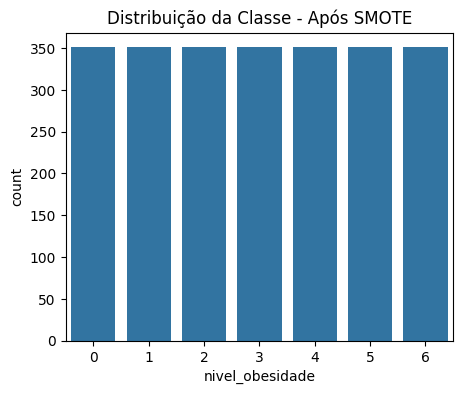

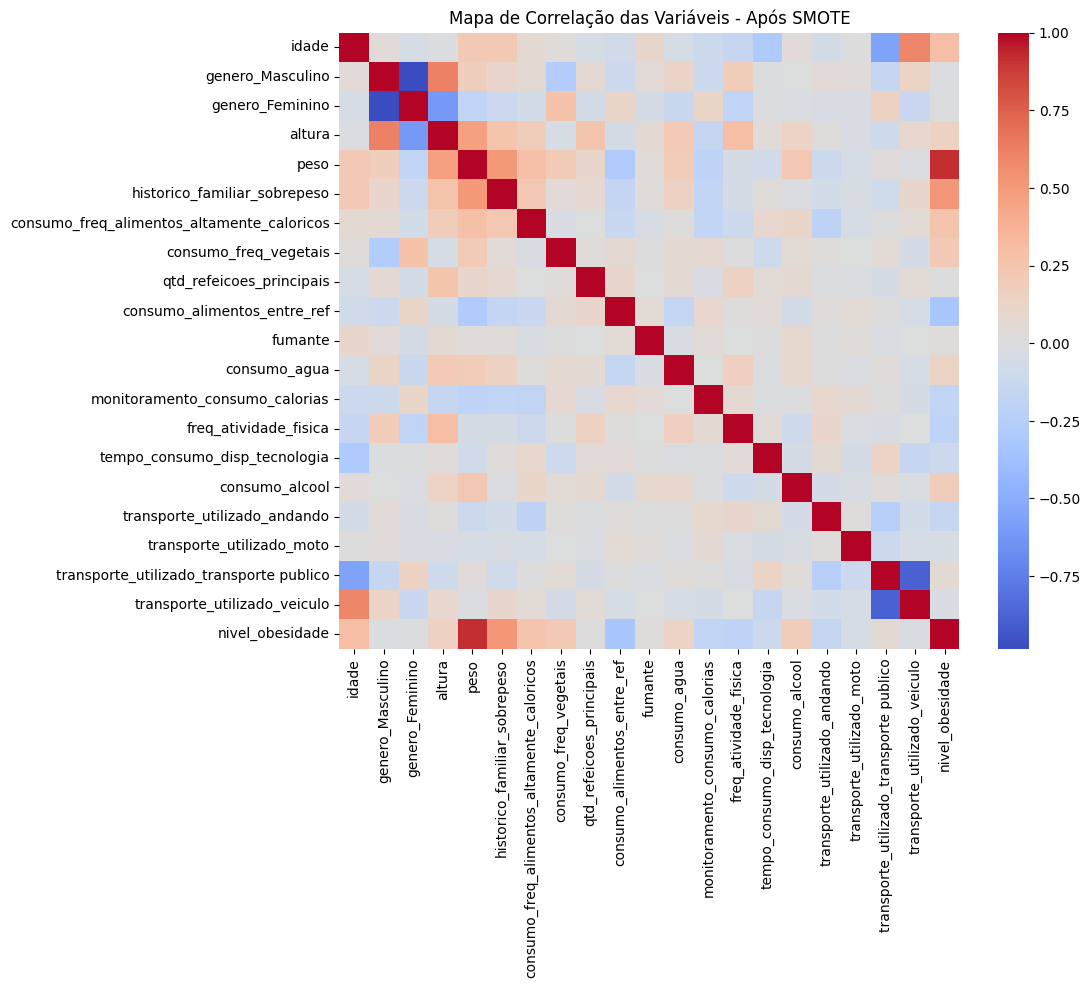

c:\Users\João P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Importância das variáveis (coeficientes):
                                      Variable  Coefficient  Abs Coefficient
3                                       altura     5.890601         5.890601
1                             genero_Masculino     2.098968         2.098968
7                        consumo_freq_vegetais     1.618540         1.618540
9                  consumo_alimentos_entre_ref     1.310029         1.310029
11                                consumo_agua     0.992720         0.992720
18     transporte_utilizado_transporte publico     0.988529         0.988529
8                     qtd_refeicoes_principais     0.859085         0.859085
6   consumo_freq_alimentos_altamente_caloricos     0.835862         0.835862
10                                     fumante    -0.821590         0.821590
14               tempo_consumo_disp_tecnologia     0.573815         0.573815
16                transporte_utilizado_andando     0.528968         0.528968
13                       freq_ativ

c:\Users\João P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


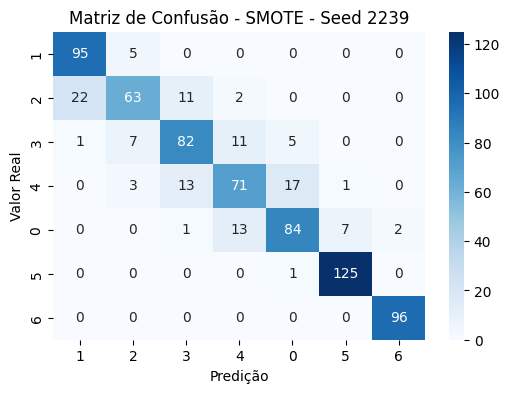

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.81      0.95      0.87       100
           2       0.81      0.64      0.72        98
           3       0.77      0.77      0.77       106
           4       0.73      0.68      0.70       105
           0       0.79      0.79      0.79       107
           5       0.94      0.99      0.97       126
           6       0.98      1.00      0.99        96

    accuracy                           0.83       738
   macro avg       0.83      0.83      0.83       738
weighted avg       0.83      0.83      0.83       738

AUC-ROC (Macro): 0.9744138089726307


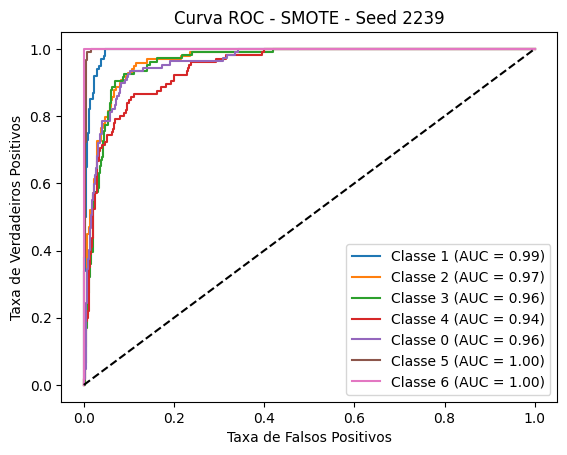

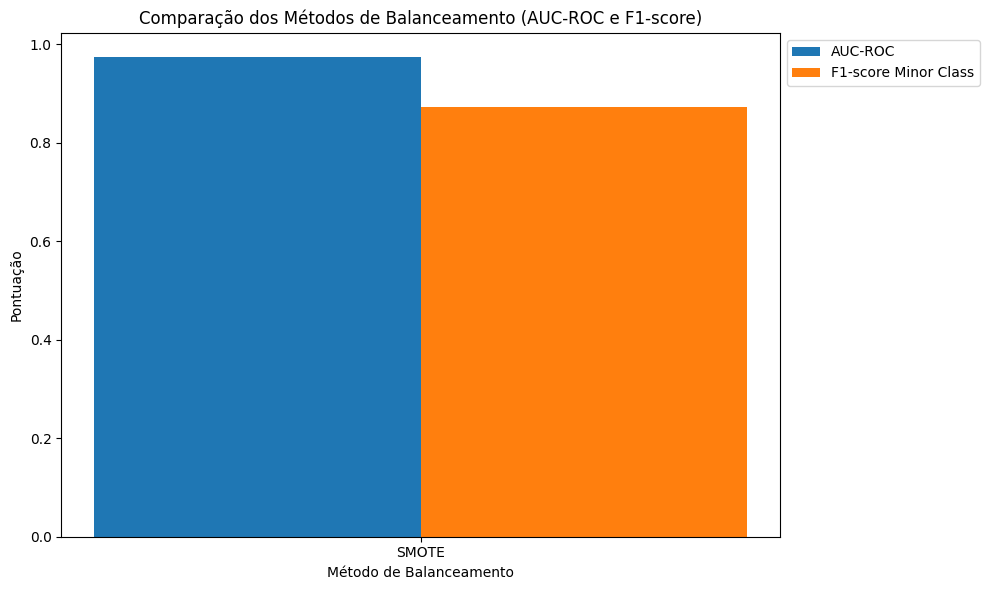

{'SMOTE': {'AUC-ROC': np.float64(0.9744138089726307),
  'F1-score Minor Class': 0.8715596330275229}}

In [60]:
compare_balancing_effects(X, y)

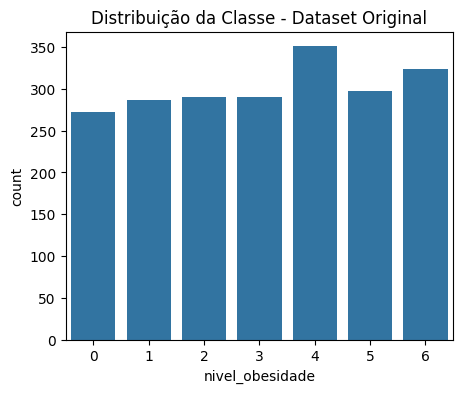

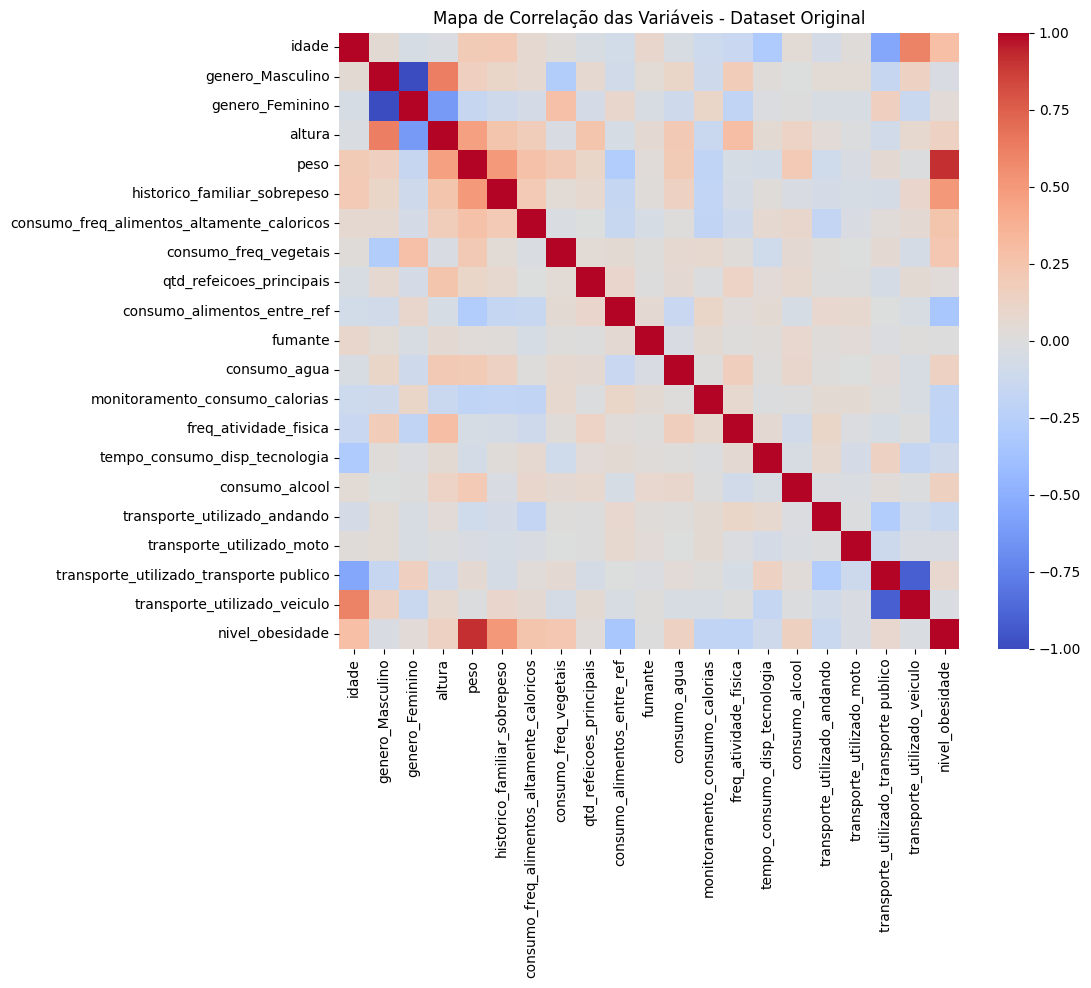

In [40]:
# Carregar dados e verificar distribuição original
plot_class_distribution_and_correlation(data, "Dataset Original")

In [41]:
# Preparar variáveis independentes e dependentes
X = data.drop('nivel_obesidade', axis=1)
y = data['nivel_obesidade']

In [42]:
# def evaluate_model(X, y, model):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#     model.fit(X_train, y_train)

#     # Importância das Variáveis
#     if hasattr(model, "feature_importances_"):
#         # feature_importances = pd.DataFrame(
#             "Feature": X_train.columns,
#             "Importance": model.feature_importances_
#         }).sort_values(by="Importance", ascending=False)
#         print("\nImportância das variáveis:")
#         print(feature_importances)

#     # Predição e Probabilidades
#     y_pred = model.predict(X_test)

#     if hasattr(model, "predict_proba"):
#         y_proba = model.predict_proba(X_test)
#         # Corrigir para problemas binários
#         if y_proba.shape[1] == 2:  # Duas colunas, pegar probabilidade da classe positiva
#             y_proba = y_proba[:, 1]
#         elif y_proba.shape[1] == 1:  # Apenas uma coluna
#             y_proba = y_proba.ravel()
#     else:
#         y_proba = y_pred  # Para modelos sem `predict_proba`, usa predições diretas

#     # Matriz de Confusão
#     cm = confusion_matrix(y_test, y_pred)
#     print(f"\nMétricas para {type(model).__name__}")
#     print("Matriz de Confusão:")
#     print(cm)

#     # Gráfico da Matriz de Confusão
#     plt.figure(figsize=(6, 4))
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
#                 xticklabels=list(map(str, sorted(y.unique()))),
#                 yticklabels=list(map(str, sorted(y.unique()))))
#     plt.xlabel("Predição")
#     plt.ylabel("Valor Real")
#     plt.title(f"Matriz de Confusão - {type(model).__name__}")
#     plt.show()

#     # Relatório de Classificação
#     print("Relatório de Classificação:")
#     report = classification_report(y_test, y_pred, output_dict=True)
#     print(classification_report(y_test, y_pred))

#     # AUC-ROC
#     try:
#         if len(y.unique()) > 2:
#             roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")
#         else:
#             roc_auc = roc_auc_score(y_test, y_proba)
#         print("AUC-ROC:", roc_auc)
#     except ValueError as e:
#         print("Erro no cálculo do AUC-ROC:", e)
#         roc_auc = None

#     # Curva ROC
#     if roc_auc is not None and len(y.unique()) <= 2:
#         fpr, tpr, thresholds = roc_curve(y_test, y_proba)
#         plt.figure()
#         plt.plot(fpr, tpr, label=f"Classe Positiva (AUC = {roc_auc:.2f})")
#         plt.plot([0, 1], [0, 1], 'k--')
#         plt.xlabel("Taxa de Falsos Positivos")
#         plt.ylabel("Taxa de Verdadeiros Positivos")
#         plt.title(f"Curva ROC - {type(model).__name__}")
#         plt.legend(loc="lower right")
#         plt.show()

#     # F1-score para a classe minoritária
#     f1_minor_class = report[str(min(y.unique()))]["f1-score"]

#     return roc_auc, f1_minor_class

#     # Aplicar SMOTE para balancear as classes
# smote = SMOTE(random_state=42)
# X_res, y_res = smote.fit_resample(X, y)

# # Modelos a serem comparados
# models = [LogisticRegression(), DecisionTreeClassifier()]
# results = {}

# # Avaliar cada modelo
# for model in models:
#     roc_auc, f1_score_minor = evaluate_model(X_res, y_res, model)
#     results[type(model).__name__] = {
#         "AUC-ROC": roc_auc,
#         "F1-score Minor Class": f1_score_minor
#     }

# # Exibir resultados comparativos
# print("\nResultados Comparativos entre Modelos:")
# for model_name, metrics in results.items():
#     print(f"{model_name}: AUC-ROC = {metrics['AUC-ROC']:.4f}, F1-score Minor Class = {metrics['F1-score Minor Class']:.4f}")

# # Identificar o melhor modelo com base em AUC-ROC e F1-score
# best_model = max(results, key=lambda x: (results[x]["AUC-ROC"], results[x]["F1-score Minor Class"]))
# print(f"\nMelhor modelo: {best_model} com AUC-ROC = {results[best_model]['AUC-ROC']:.4f} e F1-score Minor Class = {results[best_model]['F1-score Minor Class']:.4f}")

# # Gráfico Comparativo dos Resultados
# model_names = list(results.keys())
# auc_scores = [results[model]["AUC-ROC"] for model in model_names]
# f1_scores = [results[model]["F1-score Minor Class"] for model in model_names]

# plt.figure(figsize=(10, 6))
# x = range(len(model_names))
# plt.bar([p - 0.2 for p in x], auc_scores, width=0.4, label='AUC-ROC', align='center')
# plt.bar([p + 0.2 for p in x], f1_scores, width=0.4, label='F1-score Minor Class', align='center')
# plt.xticks(x, model_names)
# plt.xlabel("Modelos")
# plt.ylabel("Pontuação")
# plt.title("Comparação entre Modelos (AUC-ROC e F1-score para a Classe Minoritária)")
# plt.legend(loc="upper left")
# plt.tight_layout()
# plt.show()

In [62]:
# Arvore de descisão com model para o comitê. 01-12-2024
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import numpy as np

# Função de Avaliação do Modelo
def evaluate_model_decision_tree(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)

    # Importância das Variáveis
    if hasattr(model, "feature_importances_"):
        feature_importances = pd.DataFrame({
            "Feature": X_train.columns,
            "Importance": model.feature_importances_
        }).sort_values(by="Importance", ascending=False)
        print("\nImportância das variáveis:")
        print(feature_importances)

    # Predição e Probabilidades
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        if y_proba.shape[1] == 2:  # Para problemas binários
            y_proba = y_proba[:, 1]
        elif y_proba.shape[1] == 1:
            y_proba = y_proba.ravel()
    else:
        y_proba = y_pred  # Para modelos sem predict_proba

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nMétricas para {type(model).__name__}")
    print("Matriz de Confusão:")
    print(cm)

    # Gráfico da Matriz de Confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=list(map(str, sorted(y.unique()))),
                yticklabels=list(map(str, sorted(y.unique()))))
    plt.xlabel("Predição")
    plt.ylabel("Valor Real")
    plt.title(f"Matriz de Confusão - {type(model).__name__}")
    plt.show()

    # Relatório de Classificação
    print("Relatório de Classificação:")
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

    # AUC-ROC
    try:
        if len(y.unique()) > 2:
            roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")
        else:
            roc_auc = roc_auc_score(y_test, y_proba)
        print("AUC-ROC:", roc_auc)
    except ValueError as e:
        print("Erro no cálculo do AUC-ROC:", e)
        roc_auc = None

    # Curva ROC
    if roc_auc is not None and len(y.unique()) <= 2:
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"Classe Positiva (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("Taxa de Falsos Positivos")
        plt.ylabel("Taxa de Verdadeiros Positivos")
        plt.title(f"Curva ROC - {type(model).__name__}")
        plt.legend(loc="lower right")
        plt.show()

    # F1-score para a classe minoritária
    f1_minor_class = report[str(min(y.unique()))]["f1-score"]

    # Armazena o modelo em um arquivo .pkl
    joblib.dump(model, 'decision_tree_model.pkl') 

    return roc_auc, f1_minor_class, model

# # Aplicar SMOTE para balancear as classes
# smote = SMOTE(random_state=42)
# X_res, y_res = smote.fit_resample(X, y)

# # Dicionário para armazenar resultados
# results = {}

# # Avaliar o modelo de Árvore de Decisão
# roc_auc, f1_minor_class, fitted_model = evaluate_model_2(X_res, y_res, DecisionTreeClassifier(random_state=42))
# results["DecisionTreeClassifier"] = {
#     "AUC-ROC": roc_auc,
#     "F1-score Minor Class": f1_minor_class,
#     "model": fitted_model
# }

# # Exibir os resultados
# print("\nResultados do Modelo de Árvore de Decisão:")
# for metric, value in results["DecisionTreeClassifier"].items():
#     if metric != "model":  # Ignorar o objeto do modelo
#         print(f"{metric}: {value:.4f}")


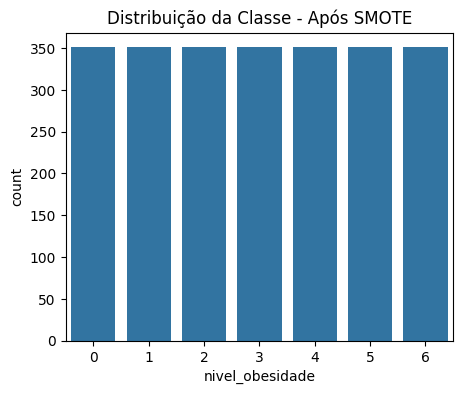

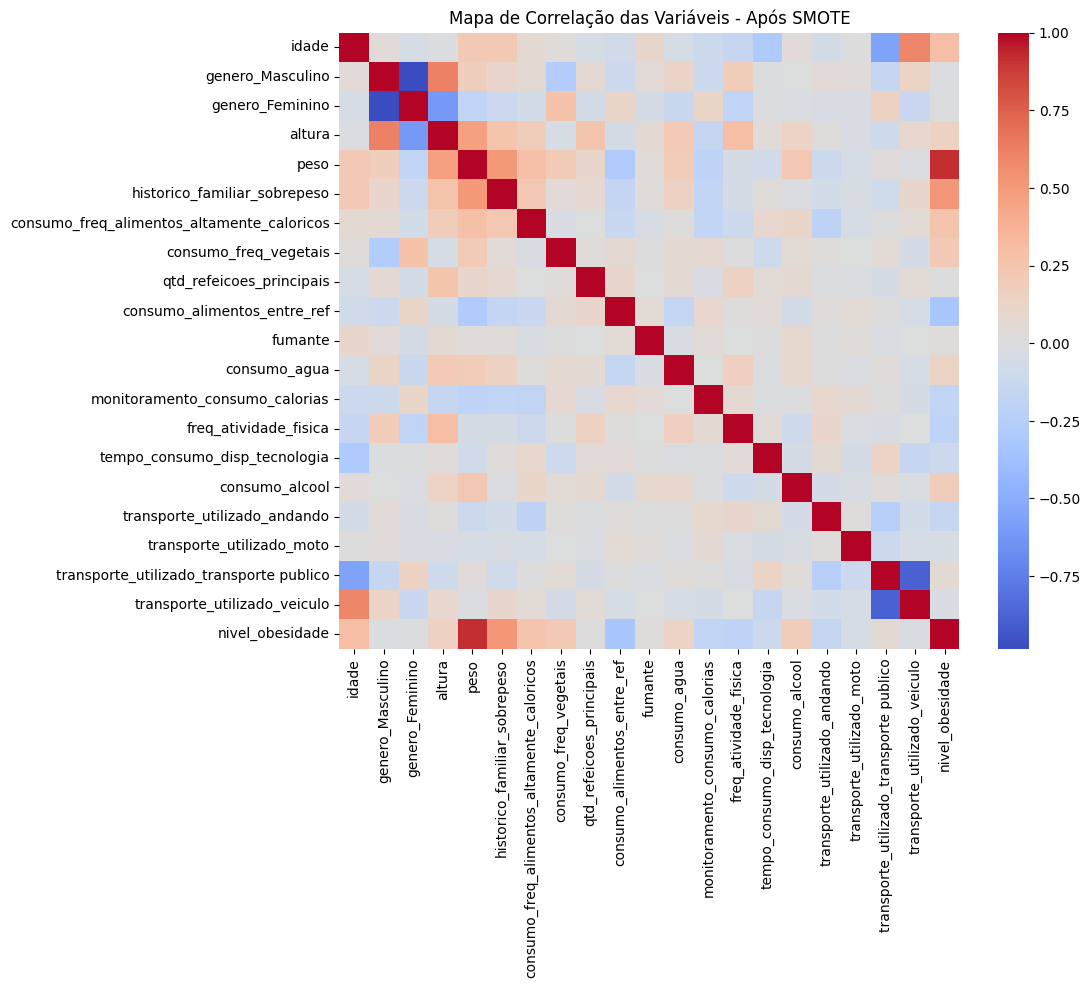

c:\Users\João P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Importância das variáveis (coeficientes):
                                      Variable  Coefficient  Abs Coefficient
3                                       altura     5.890601         5.890601
1                             genero_Masculino     2.098968         2.098968
7                        consumo_freq_vegetais     1.618540         1.618540
9                  consumo_alimentos_entre_ref     1.310029         1.310029
11                                consumo_agua     0.992720         0.992720
18     transporte_utilizado_transporte publico     0.988529         0.988529
8                     qtd_refeicoes_principais     0.859085         0.859085
6   consumo_freq_alimentos_altamente_caloricos     0.835862         0.835862
10                                     fumante    -0.821590         0.821590
14               tempo_consumo_disp_tecnologia     0.573815         0.573815
16                transporte_utilizado_andando     0.528968         0.528968
13                       freq_ativ

c:\Users\João P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


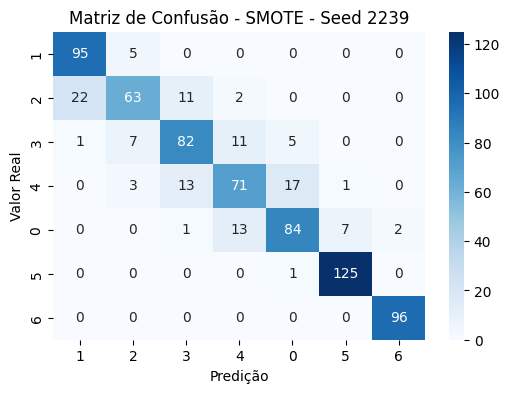

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.81      0.95      0.87       100
           2       0.81      0.64      0.72        98
           3       0.77      0.77      0.77       106
           4       0.73      0.68      0.70       105
           0       0.79      0.79      0.79       107
           5       0.94      0.99      0.97       126
           6       0.98      1.00      0.99        96

    accuracy                           0.83       738
   macro avg       0.83      0.83      0.83       738
weighted avg       0.83      0.83      0.83       738

AUC-ROC (Macro): 0.9744138089726307


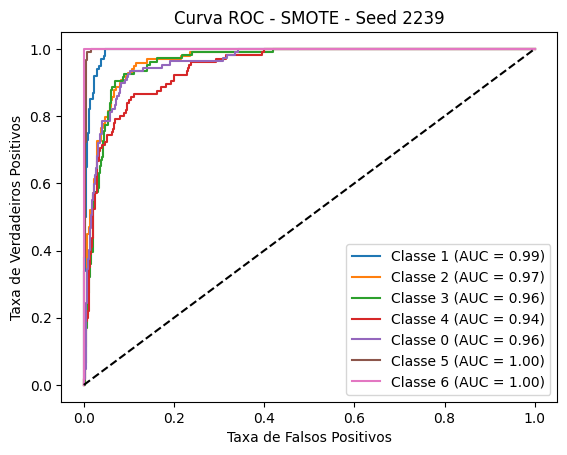

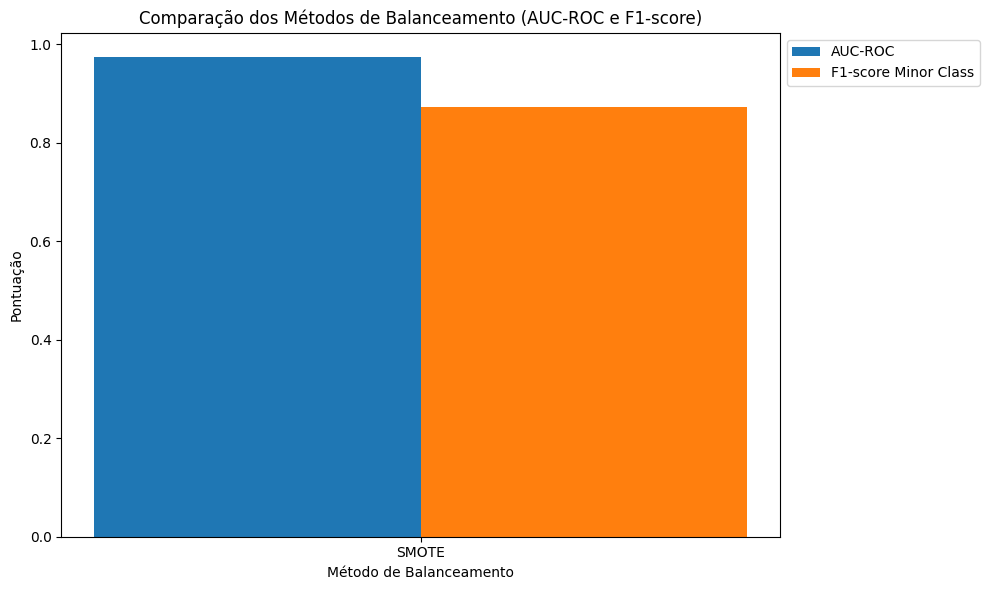

{'SMOTE': {'AUC-ROC': np.float64(0.9744138089726307), 'F1-score Minor Class': 0.8715596330275229}}

Importância das variáveis:
                                       Feature  Importance
4                                         peso    0.486184
3                                       altura    0.206365
2                              genero_Feminino    0.150908
0                                        idade    0.041365
6   consumo_freq_alimentos_altamente_caloricos    0.023790
15                              consumo_alcool    0.018981
7                        consumo_freq_vegetais    0.013109
8                     qtd_refeicoes_principais    0.012249
13                       freq_atividade_fisica    0.011698
14               tempo_consumo_disp_tecnologia    0.009739
11                                consumo_agua    0.008373
9                  consumo_alimentos_entre_ref    0.007408
18     transporte_utilizado_transporte publico    0.004593
19                transporte_utilizado_veiculo 

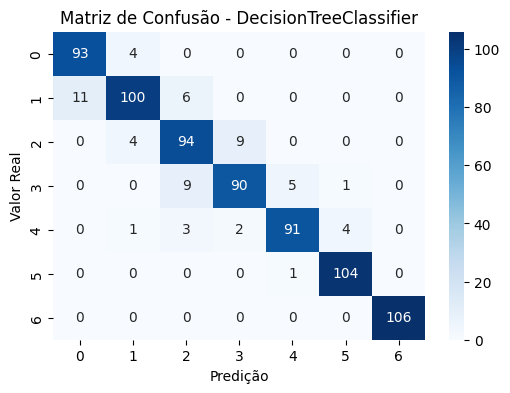

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        97
           1       0.92      0.85      0.88       117
           2       0.84      0.88      0.86       107
           3       0.89      0.86      0.87       105
           4       0.94      0.90      0.92       101
           5       0.95      0.99      0.97       105
           6       1.00      1.00      1.00       106

    accuracy                           0.92       738
   macro avg       0.92      0.92      0.92       738
weighted avg       0.92      0.92      0.92       738

AUC-ROC: 0.9532644541594778
{'SMOTE': {'AUC-ROC': np.float64(0.9744138089726307), 'F1-score Minor Class': 0.8715596330275229}, 'DecisionTreeClassifier': {'AUC-ROC': np.float64(0.9532644541594778), 'F1-score Minor Class': 0.9253731343283582, 'model': DecisionTreeClassifier(random_state=42)}}


In [63]:
# Comparar os efeitos dos métodos de balanceamento
# Dataset já foi balanceado através do método SMOTE
results = compare_balancing_effects(X, y)
print (results)

# Avaliar o modelo de Árvore de Decisão
roc_auc, f1_minor_class, fitted_model = evaluate_model_decision_tree(X_res, y_res, DecisionTreeClassifier(random_state=42))
results["DecisionTreeClassifier"] = {
    "AUC-ROC": roc_auc,
    "F1-score Minor Class": f1_minor_class,
    "model": fitted_model
}
print (results)

c:\Users\João P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhor modelo encontrado: MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(150, 150),
              random_state=42)

Métricas para MLPClassifier
Matriz de Confusão:
[[82  4  0  0  0  0  0]
 [17 57 14  5  0  0  0]
 [ 0 15 58 15  0  0  0]
 [ 0  3 12 59  4  1  0]
 [ 0  1  0 17 76  7  1]
 [ 0  0  0  0  1 87  0]
 [ 0  0  0  0  0  0 98]]


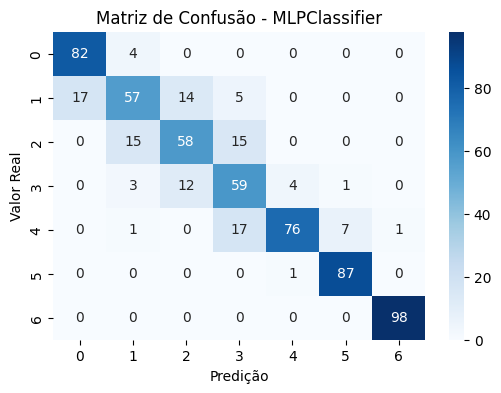

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        86
           1       0.71      0.61      0.66        93
           2       0.69      0.66      0.67        88
           3       0.61      0.75      0.67        79
           4       0.94      0.75      0.83       102
           5       0.92      0.99      0.95        88
           6       0.99      1.00      0.99        98

    accuracy                           0.82       634
   macro avg       0.81      0.82      0.81       634
weighted avg       0.82      0.82      0.81       634

AUC-ROC: 0.970416311375429
{'SMOTE': {'AUC-ROC': np.float64(0.9744138089726307), 'F1-score Minor Class': 0.8715596330275229}, 'DecisionTreeClassifier': {'AUC-ROC': np.float64(0.9532644541594778), 'F1-score Minor Class': 0.9253731343283582, 'model': DecisionTreeClassifier(random_state=42)}, 'MLPClassifier': {'AUC-ROC': np.float64(0.970416311375429), 'F1-score Minor Class': 

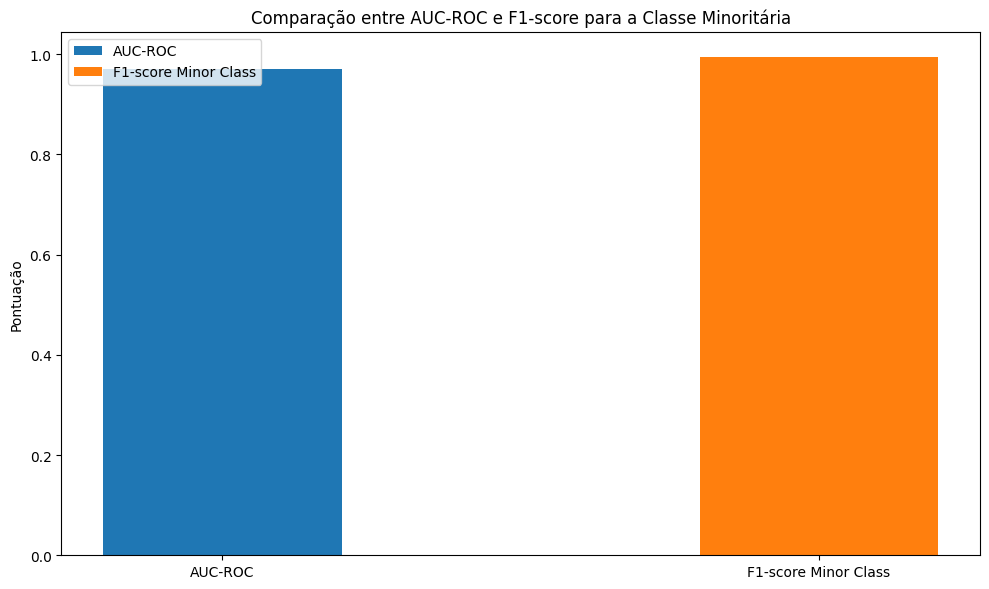

In [67]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Definir parâmetros e realizar GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (150, 150)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search = GridSearchCV(MLPClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_res, y_res)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_
print(f"Melhor modelo encontrado: {best_model}")

# Função para calcular e exibir métricas de avaliação
def evaluate_model_MLPClassifier(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)

    # Predição e Probabilidades
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
    else:
        y_proba = None  # Para modelos que não suportam predict_proba

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nMétricas para {type(model).__name__}")
    print("Matriz de Confusão:")
    print(cm)

    # Gráfico da Matriz de Confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel("Predição")
    plt.ylabel("Valor Real")
    plt.title(f"Matriz de Confusão - {type(model).__name__}")
    plt.show()

    # Relatório de Classificação
    print("Relatório de Classificação:")
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

    # AUC-ROC
    if y_proba is not None:
        if len(np.unique(y)) > 2:  # Caso multiclasse
            roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovr")
        else:  # Caso binário
            roc_auc = roc_auc_score(y_test, y_proba[:, 1])
        print("AUC-ROC:", roc_auc)

        # Curva ROC (apenas para o caso binário)
        if len(np.unique(y)) == 2:
            fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
            plt.figure()
            plt.plot(fpr, tpr, label="AUC-ROC Curve (AUC = {:.2f})".format(roc_auc))
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlabel("Taxa de Falsos Positivos")
            plt.ylabel("Taxa de Verdadeiros Positivos")
            plt.title(f"Curva ROC - {type(model).__name__}")
            plt.legend(loc="lower right")
            plt.show()
    else:
        roc_auc = None
        print("AUC-ROC não pode ser calculado, modelo não suporta probabilidades.")

    # Retornar métricas relevantes para comparação
    f1_minor_class = report[str(np.unique(y)[-1])]["f1-score"]  # F1-score para a última classe

    # Armazena o modelo em um arquivo .pkl
    joblib.dump(model, 'MLP_classifier_model.pkl')

    return roc_auc, f1_minor_class, model



# Avaliar o modelo
roc_auc, f1_score_minor, fitted_model =  evaluate_model_MLPClassifier(X, y, MLPClassifier(max_iter=500, random_state=42))

results["MLPClassifier"] = {
    "AUC-ROC": roc_auc,
    "F1-score Minor Class": f1_score_minor,
    "model": fitted_model
}
print(results)

# Exibir resultados comparativos
print("\nResultados Comparativos entre Modelos:")
print(f"MLPClassifier: AUC-ROC = {roc_auc:.4f}, F1-score Minor Class = {f1_score_minor:.4f}")

# Gráfico Comparativo dos Resultados
# Neste caso, como temos apenas um modelo, será mais simples, mas o código pode ser adaptado para mais modelos no futuro
plt.figure(figsize=(10, 6))
plt.bar([0], [roc_auc], width=0.4, label='AUC-ROC', align='center')
plt.bar([1], [f1_score_minor], width=0.4, label='F1-score Minor Class', align='center')
plt.xticks([0, 1], ['AUC-ROC', 'F1-score Minor Class'])
plt.ylabel("Pontuação")
plt.title("Comparação entre AUC-ROC e F1-score para a Classe Minoritária")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

c:\Users\João P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Métricas para LogisticRegression
Matriz de Confusão:
[[ 94   3   0   0   0   0   0]
 [ 21  71  21   4   0   0   0]
 [  0   7  74  22   4   0   0]
 [  0   1  11  75  14   4   0]
 [  0   0   2  12  74  11   2]
 [  0   0   0   0   1 104   0]
 [  0   0   0   0   0   0 106]]


c:\Users\João P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


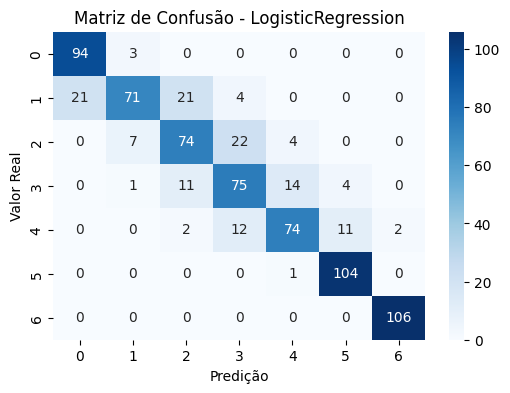

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        97
           1       0.87      0.61      0.71       117
           2       0.69      0.69      0.69       107
           3       0.66      0.71      0.69       105
           4       0.80      0.73      0.76       101
           5       0.87      0.99      0.93       105
           6       0.98      1.00      0.99       106

    accuracy                           0.81       738
   macro avg       0.81      0.81      0.81       738
weighted avg       0.81      0.81      0.81       738


Métricas para DecisionTreeClassifier
Matriz de Confusão:
[[ 94   3   0   0   0   0   0]
 [  9 101   7   0   0   0   0]
 [  0  12  91   4   0   0   0]
 [  0   0   6  92   5   2   0]
 [  0   1   0   5  93   2   0]
 [  0   0   0   0   2 103   0]
 [  0   0   0   0   0   0 106]]


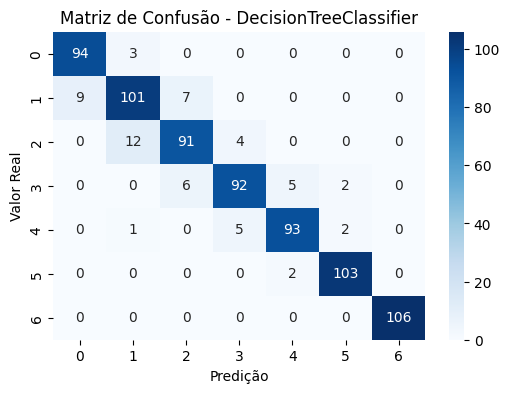

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        97
           1       0.86      0.86      0.86       117
           2       0.88      0.85      0.86       107
           3       0.91      0.88      0.89       105
           4       0.93      0.92      0.93       101
           5       0.96      0.98      0.97       105
           6       1.00      1.00      1.00       106

    accuracy                           0.92       738
   macro avg       0.92      0.92      0.92       738
weighted avg       0.92      0.92      0.92       738


Métricas para MLPClassifier
Matriz de Confusão:
[[ 95   2   0   0   0   0   0]
 [ 20  65  26   6   0   0   0]
 [  0   4  86  11   6   0   0]
 [  0   2  14  75  14   0   0]
 [  0   0   2   7  89   3   0]
 [  0   0   0   0   5 100   0]
 [  0   0   0   0   0   0 106]]


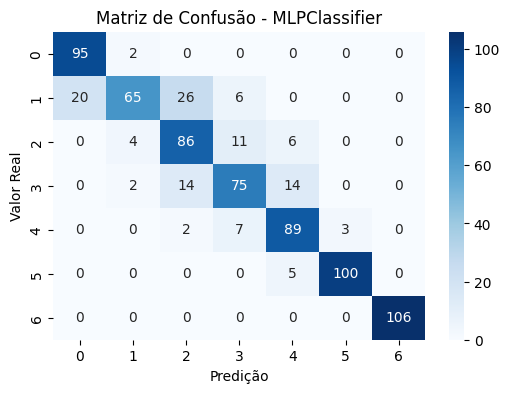

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        97
           1       0.89      0.56      0.68       117
           2       0.67      0.80      0.73       107
           3       0.76      0.71      0.74       105
           4       0.78      0.88      0.83       101
           5       0.97      0.95      0.96       105
           6       1.00      1.00      1.00       106

    accuracy                           0.83       738
   macro avg       0.84      0.84      0.83       738
weighted avg       0.84      0.83      0.83       738


Matriz de Confusão do Comitê de Classificação:
[[ 93   4   0   0   0   0   0]
 [ 12  97   6   2   0   0   0]
 [  0  11  90   6   0   0   0]
 [  0   1   5  92   6   1   0]
 [  0   0   1   4  94   2   0]
 [  0   0   0   0   2 103   0]
 [  0   0   0   0   0   0 106]]


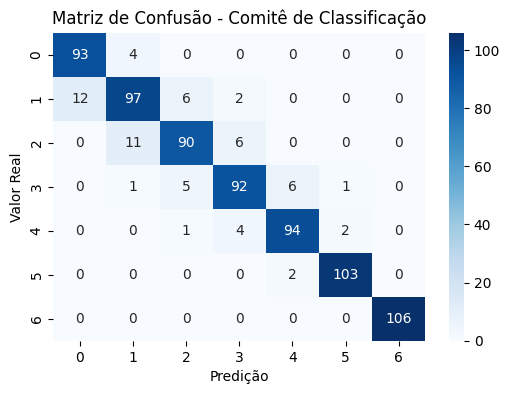

Relatório de Classificação do Comitê:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        97
           1       0.86      0.83      0.84       117
           2       0.88      0.84      0.86       107
           3       0.88      0.88      0.88       105
           4       0.92      0.93      0.93       101
           5       0.97      0.98      0.98       105
           6       1.00      1.00      1.00       106

    accuracy                           0.91       738
   macro avg       0.91      0.92      0.92       738
weighted avg       0.91      0.91      0.91       738



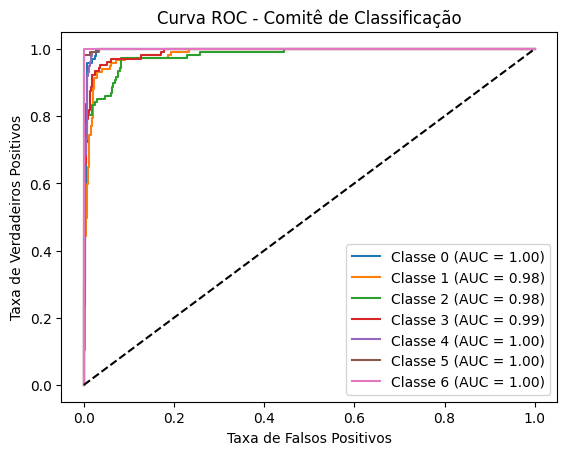

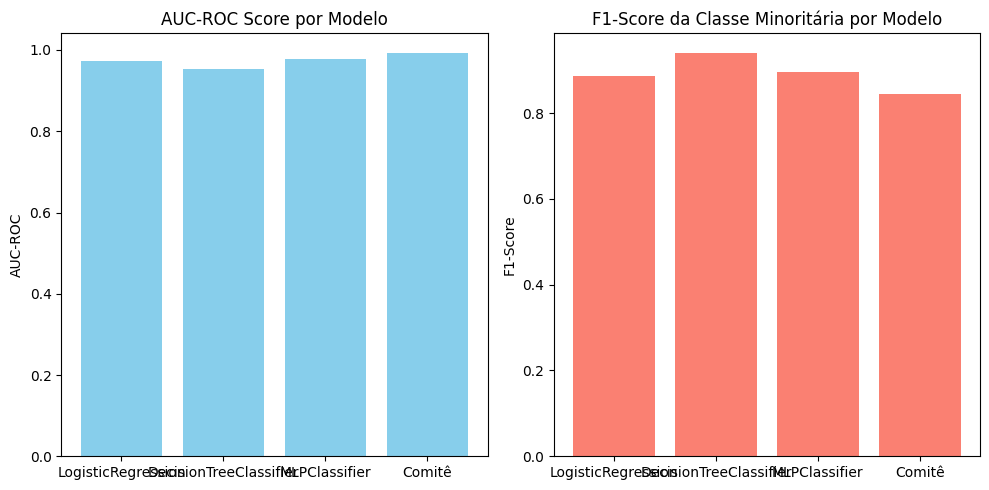

    Índice  Classe Esperada  Classe Predita
0      719                0               0
1      785                2               2
2     1606                5               5
3      867                2               2
4     1084                3               4
..     ...              ...             ...
95     387                4               4
96    1448                4               4
97     367                2               1
98    1023                3               3
99    1602                5               5

[100 rows x 3 columns]


In [75]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# Função para calcular e exibir métricas de avaliação
def evaluate_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)  # Aqui pegamos todas as probabilidades das classes
    
    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nMétricas para {type(model).__name__}")
    print("Matriz de Confusão:")
    print(cm)
    
    # Visualizando a Matriz de Confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predição")
    plt.ylabel("Valor Real")
    plt.title(f"Matriz de Confusão - {type(model).__name__}")
    plt.show()
    
    # Relatório de Classificação
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))
    
    # AUC-ROC
    n_classes = len(np.unique(y_test))
    if n_classes == 2:  # Problema binário
        # Verificar se y_proba tem a forma correta (duas colunas)
        if y_proba.shape[1] > 1:
            roc_auc = roc_auc_score(y_test, y_proba[:, 1])  # Aqui para binário, pegamos a coluna de classe 1
        else:
            roc_auc = roc_auc_score(y_test, y_proba)  # Caso haja apenas uma coluna
    else:  # Problema multiclasse
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Binarizar os rótulos
        roc_auc = roc_auc_score(y_test_bin, y_proba, multi_class="ovr", average="weighted")
    
    # F1-score para a classe minoritária
    f1_minor_class = report[str(np.min(y.unique()))]["f1-score"]
    
    return {
        "model": model,
        "y_pred": y_pred,
        "y_proba": y_proba,
        "roc_auc": roc_auc,
        "f1_score_minor": f1_minor_class
    }

# Função para plotar a curva ROC para binário ou multiclasse
def plot_roc_curve(y_test, y_proba, title):
    """
    Plota a curva ROC para problemas binários ou multiclasse.
    """
    n_classes = len(np.unique(y_test))
    
    if n_classes == 2:  # Problema binário
        fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])  # Aqui para binário, usamos a probabilidade da classe 1
        roc_auc = roc_auc_score(y_test, y_proba[:, 1])
        plt.figure()
        plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc))
        plt.plot([0, 1], [0, 1], "k--")
        plt.xlabel("Taxa de Falsos Positivos")
        plt.ylabel("Taxa de Verdadeiros Positivos")
        plt.title(title)
        plt.legend(loc="lower right")
        plt.show()
    else:  # Problema multiclasse
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Binarizar os rótulos
        fpr = {}
        tpr = {}
        roc_auc = {}
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_proba[:, i], multi_class="ovr")

        plt.figure()
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f"Classe {i} (AUC = {roc_auc[i]:.2f})")
        plt.plot([0, 1], [0, 1], "k--")
        plt.xlabel("Taxa de Falsos Positivos")
        plt.ylabel("Taxa de Verdadeiros Positivos")
        plt.title(title)
        plt.legend(loc="lower right")
        plt.show()

# Função para calcular as predições ponderadas
def calculate_weighted_predictions(results, X_test):
    final_proba = np.zeros((len(X_test), len(np.unique(y_test))))  # Ajustar para múltiplas classes
    for result in results:
        model = result["model"]
        weight = result["roc_auc"] / sum([r["roc_auc"] for r in results])
        proba = model.predict_proba(X_test)
        final_proba += weight * proba
    final_pred = np.argmax(final_proba, axis=1)  # Para multiclasse, usamos o índice da classe com maior probabilidade
    return final_proba, final_pred

# Carregar os modelos salvos (substituindo o treinamento)
model_log_reg = joblib.load('logistic_regression_model.pkl')
model_tree = joblib.load('decision_tree_model.pkl')
model_mlp = joblib.load('MLP_classifier_model.pkl')

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Modelos a serem usados no comitê (modelos carregados)
models = [model_log_reg, model_tree, model_mlp]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Avaliar cada modelo e armazenar os resultados
results = [evaluate_model(X_train, y_train, X_test, y_test, model) for model in models]

# Predições ponderadas do comitê
final_proba, final_pred = calculate_weighted_predictions(results, X_test)

# Matriz de Confusão do Comitê
cm = confusion_matrix(y_test, final_pred)
print("\nMatriz de Confusão do Comitê de Classificação:")
print(cm)

# Gráfico da Matriz de Confusão do Comitê
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predição")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusão - Comitê de Classificação")
plt.show()

# Relatório de Classificação do Comitê
print("Relatório de Classificação do Comitê:")
print(classification_report(y_test, final_pred))

# Curva ROC do Comitê
plot_roc_curve(y_test, final_proba, title="Curva ROC - Comitê de Classificação")

# Gráfico Comparativo dos Resultados
model_names = [type(result["model"]).__name__ for result in results] + ["Comitê"]  # Adicionando "Comitê"
# AUC-ROC: Adicionando a AUC do comitê corretamente
if final_proba.shape[1] > 1:
    auc_scores = [result["roc_auc"] for result in results] + [roc_auc_score(y_test, final_proba, multi_class="ovr")]
else:
    auc_scores = [result["roc_auc"] for result in results] + [roc_auc_score(y_test, final_proba[:, 0])]  # Para binário

# F1-Score: Adicionando o F1-score do comitê corretamente
f1_scores = [result["f1_score_minor"] for result in results] + [classification_report(y_test, final_pred, output_dict=True)["1"]["f1-score"]]

# Exibindo os gráficos
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(model_names, auc_scores, color='skyblue')
plt.title('AUC-ROC Score por Modelo')
plt.ylabel('AUC-ROC')
plt.subplot(1, 2, 2)
plt.bar(model_names, f1_scores, color='salmon')
plt.title('F1-Score da Classe Minoritária por Modelo')
plt.ylabel('F1-Score')
plt.tight_layout()
plt.show()


# Criar DataFrame com as classificações
classification_results = pd.DataFrame({
    "Índice": X_test.index,
    "Classe Esperada": y_test.values,
    "Classe Predita": final_pred
})

# Exibir as primeiras linhas dos resultados de classificação
print(classification_results.head(100))


c:\Users\João P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Métricas para LogisticRegression
Matriz de Confusão:
[[ 94   3   0   0   0   0   0]
 [ 21  71  21   4   0   0   0]
 [  0   7  74  22   4   0   0]
 [  0   1  11  75  14   4   0]
 [  0   0   2  12  74  11   2]
 [  0   0   0   0   1 104   0]
 [  0   0   0   0   0   0 106]]


c:\Users\João P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


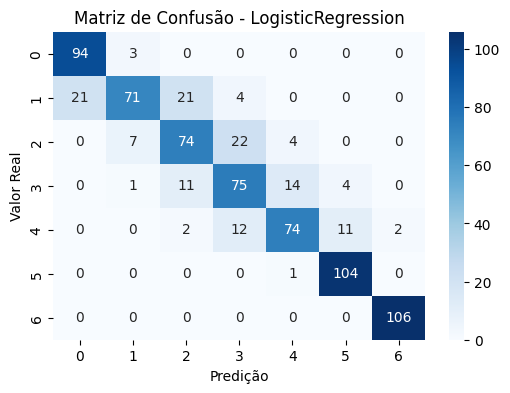

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        97
           1       0.87      0.61      0.71       117
           2       0.69      0.69      0.69       107
           3       0.66      0.71      0.69       105
           4       0.80      0.73      0.76       101
           5       0.87      0.99      0.93       105
           6       0.98      1.00      0.99       106

    accuracy                           0.81       738
   macro avg       0.81      0.81      0.81       738
weighted avg       0.81      0.81      0.81       738


Métricas para DecisionTreeClassifier
Matriz de Confusão:
[[ 94   3   0   0   0   0   0]
 [  9 101   7   0   0   0   0]
 [  0  12  91   4   0   0   0]
 [  0   0   6  92   5   2   0]
 [  0   1   0   5  93   2   0]
 [  0   0   0   0   2 103   0]
 [  0   0   0   0   0   0 106]]


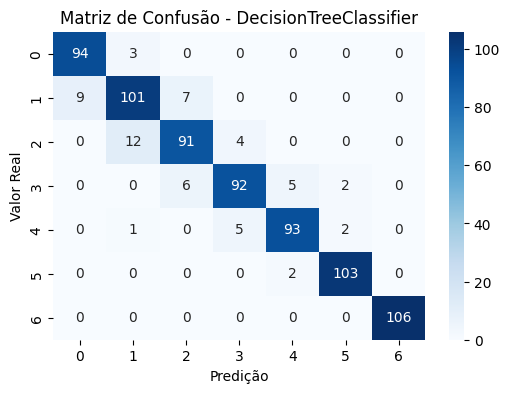

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        97
           1       0.86      0.86      0.86       117
           2       0.88      0.85      0.86       107
           3       0.91      0.88      0.89       105
           4       0.93      0.92      0.93       101
           5       0.96      0.98      0.97       105
           6       1.00      1.00      1.00       106

    accuracy                           0.92       738
   macro avg       0.92      0.92      0.92       738
weighted avg       0.92      0.92      0.92       738


Métricas para MLPClassifier
Matriz de Confusão:
[[ 95   2   0   0   0   0   0]
 [ 20  65  26   6   0   0   0]
 [  0   4  86  11   6   0   0]
 [  0   2  14  75  14   0   0]
 [  0   0   2   7  89   3   0]
 [  0   0   0   0   5 100   0]
 [  0   0   0   0   0   0 106]]


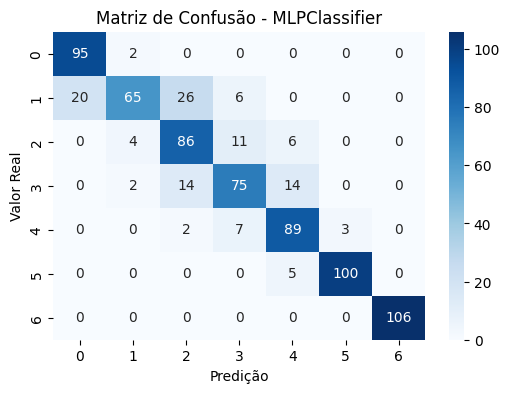

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        97
           1       0.89      0.56      0.68       117
           2       0.67      0.80      0.73       107
           3       0.76      0.71      0.74       105
           4       0.78      0.88      0.83       101
           5       0.97      0.95      0.96       105
           6       1.00      1.00      1.00       106

    accuracy                           0.83       738
   macro avg       0.84      0.84      0.83       738
weighted avg       0.84      0.83      0.83       738


Matriz de Confusão do Comitê de Classificação:
[[ 93   4   0   0   0   0   0]
 [ 12  97   6   2   0   0   0]
 [  0  11  90   6   0   0   0]
 [  0   1   5  92   6   1   0]
 [  0   0   1   4  94   2   0]
 [  0   0   0   0   2 103   0]
 [  0   0   0   0   0   0 106]]


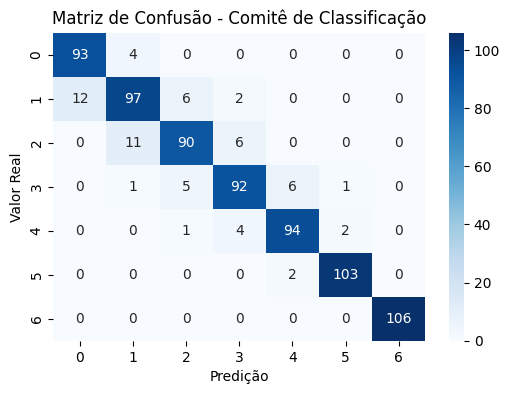

Relatório de Classificação do Comitê:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        97
           1       0.86      0.83      0.84       117
           2       0.88      0.84      0.86       107
           3       0.88      0.88      0.88       105
           4       0.92      0.93      0.93       101
           5       0.97      0.98      0.98       105
           6       1.00      1.00      1.00       106

    accuracy                           0.91       738
   macro avg       0.91      0.92      0.92       738
weighted avg       0.91      0.91      0.91       738



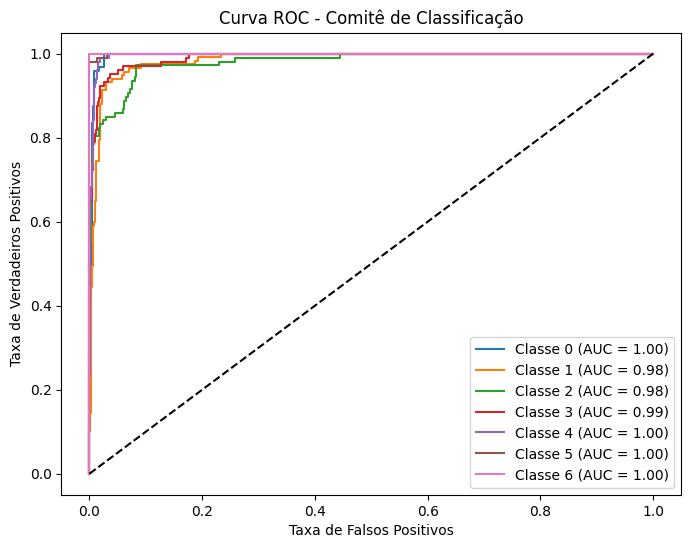

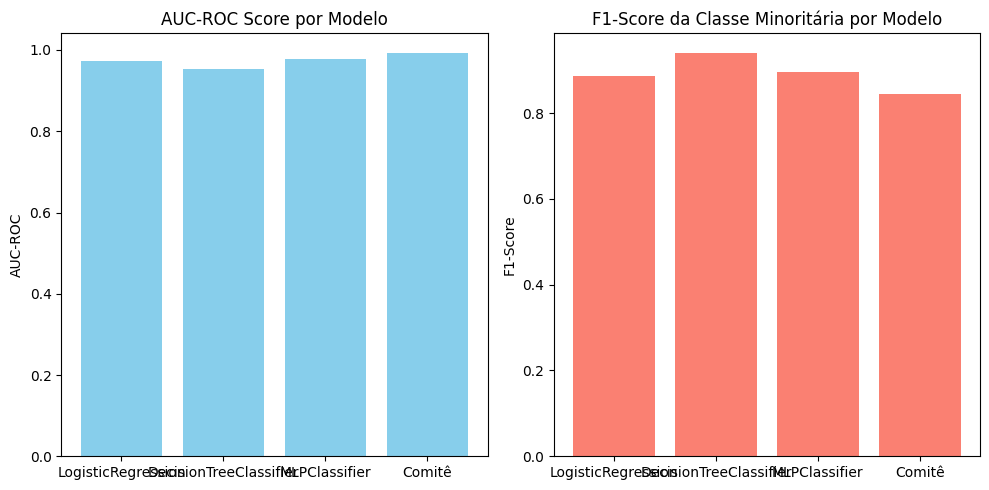

    Índice  Classe Esperada  Classe Predita
0      719                0               0
1      785                2               2
2     1606                5               5
3      867                2               2
4     1084                3               4
..     ...              ...             ...
95     387                4               4
96    1448                4               4
97     367                2               1
98    1023                3               3
99    1602                5               5

[100 rows x 3 columns]


In [76]:
# VERSAO ATOMIZADA
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# Função para calcular e exibir métricas de avaliação
def evaluate_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)  # Aqui pegamos todas as probabilidades das classes
    
    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nMétricas para {type(model).__name__}")
    print("Matriz de Confusão:")
    print(cm)
    
    # Visualizando a Matriz de Confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predição")
    plt.ylabel("Valor Real")
    plt.title(f"Matriz de Confusão - {type(model).__name__}")
    plt.show()
    
    # Relatório de Classificação
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))
    
    # AUC-ROC
    n_classes = len(np.unique(y_test))
    if n_classes == 2:  # Problema binário
        if y_proba.shape[1] > 1:
            roc_auc = roc_auc_score(y_test, y_proba[:, 1])  # Para binário, pegamos a coluna de classe 1
        else:
            roc_auc = roc_auc_score(y_test, y_proba)  # Caso haja apenas uma coluna
    else:  # Problema multiclasse
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Binarizar os rótulos
        roc_auc = roc_auc_score(y_test_bin, y_proba, multi_class="ovr", average="weighted")
    
    # F1-score para a classe minoritária
    f1_minor_class = report[str(np.min(y_test))]["f1-score"]
    
    return {
        "model": model,
        "y_pred": y_pred,
        "y_proba": y_proba,
        "roc_auc": roc_auc,
        "f1_score_minor": f1_minor_class
    }

# Função para plotar a curva ROC para binário ou multiclasse
def plot_roc_curve(y_test, y_proba, title):
    n_classes = len(np.unique(y_test))
    
    plt.figure(figsize=(8, 6))
    if n_classes == 2:  # Problema binário
        fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])  # Para binário, usamos a probabilidade da classe 1
        roc_auc = roc_auc_score(y_test, y_proba[:, 1])
        plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc))
    else:  # Problema multiclasse
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Binarizar os rótulos
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc = roc_auc_score(y_test_bin[:, i], y_proba[:, i], multi_class="ovr")
            plt.plot(fpr, tpr, label=f"Classe {i} (AUC = {roc_auc:.2f})")
    
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Função para calcular as predições ponderadas
def calculate_weighted_predictions(results, X_test):
    final_proba = np.zeros((len(X_test), len(np.unique(y_test))))  # Ajustar para múltiplas classes
    for result in results:
        model = result["model"]
        weight = result["roc_auc"] / sum([r["roc_auc"] for r in results])
        proba = model.predict_proba(X_test)
        final_proba += weight * proba
    final_pred = np.argmax(final_proba, axis=1)  # Para multiclasse, usamos o índice da classe com maior probabilidade
    return final_proba, final_pred

# Carregar os modelos salvos
model_log_reg = joblib.load('logistic_regression_model.pkl')
model_tree = joblib.load('decision_tree_model.pkl')
model_mlp = joblib.load('MLP_classifier_model.pkl')

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Modelos a serem usados no comitê
models = [model_log_reg, model_tree, model_mlp]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Avaliar cada modelo e armazenar os resultados
results = [evaluate_model(X_train, y_train, X_test, y_test, model) for model in models]

# Predições ponderadas do comitê
final_proba, final_pred = calculate_weighted_predictions(results, X_test)

# Matriz de Confusão do Comitê
cm = confusion_matrix(y_test, final_pred)
print("\nMatriz de Confusão do Comitê de Classificação:")
print(cm)

# Gráfico da Matriz de Confusão do Comitê
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predição")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusão - Comitê de Classificação")
plt.show()

# Relatório de Classificação do Comitê
print("Relatório de Classificação do Comitê:")
print(classification_report(y_test, final_pred))

# Curva ROC do Comitê
plot_roc_curve(y_test, final_proba, title="Curva ROC - Comitê de Classificação")

# Gráfico Comparativo dos Resultados
model_names = [type(result["model"]).__name__ for result in results] + ["Comitê"]
# AUC-ROC: Adicionando a AUC do comitê corretamente
if final_proba.shape[1] > 1:
    auc_scores = [result["roc_auc"] for result in results] + [roc_auc_score(y_test, final_proba, multi_class="ovr")]
else:
    auc_scores = [result["roc_auc"] for result in results] + [roc_auc_score(y_test, final_proba[:, 0])]  # Para binário

# F1-Score: Adicionando o F1-score do comitê corretamente
f1_scores = [result["f1_score_minor"] for result in results] + [classification_report(y_test, final_pred, output_dict=True)["1"]["f1-score"]]

# Exibindo os gráficos
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(model_names, auc_scores, color='skyblue')
plt.title('AUC-ROC Score por Modelo')
plt.ylabel('AUC-ROC')
plt.subplot(1, 2, 2)
plt.bar(model_names, f1_scores, color='salmon')
plt.title('F1-Score da Classe Minoritária por Modelo')
plt.ylabel('F1-Score')
plt.tight_layout()
plt.show()

# Criar DataFrame com as classificações
classification_results = pd.DataFrame({
    "Índice": X_test.index,
    "Classe Esperada": y_test.values,
    "Classe Predita": final_pred
})

# Exibir as primeiras linhas dos resultados de classificação
print(classification_results.head(100))
